[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1wfaaIZfBettCzyZqvYn6LeCOgORgq-Td?usp=sharing)

# Comparision of Top 6 LMSYS Vison models with a Single API

It is imperative to test different LLMs for your use case to ensure optimal performance and accuracy. However, this process can be cumbersome, as it often involves downloading multiple packages and navigating various APIs. The complexity and effort required can be a significant barrier to effective evaluation.

Portkey simplifies this process significantly. As an open-source [**AI Gateway**](https://github.com/Portkey-AI/gateway), Portkey provides a streamlined solution to manage access to over 250 LLMs through a single, unified API. This not only saves time and reduces complexity but also offers valuable insights into cost, performance, and accuracy metrics.

With Portkey, you can efficiently compare and evaluate a wide range of LLMs, ensuring you choose the best model for your needs.

In this notebook, we illustrate how to run Top 10 LMSYS models with a single unified API using Portkey.

### Quickstart

In [ ]:
!pip install -qU portkey-ai openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 720.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00


To start, get your Portkey API key by signing up https://app.portkey.ai/. (Go to "Settings" -> "API Keys" -> Create an API key with apporpriate scope)

# Testing With Math Problem

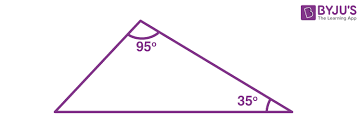

In [ ]:
from openai import OpenAI
from portkey_ai import PORTKEY_GATEWAY_URL, createHeaders
from tabulate import tabulate
from google.colab import userdata


# Top 6 LMSYS models (list of models and providers)
top_6_models = [
    ["gpt-4o", "openai"],
    ["gpt-4-turbo", "openai"],
    ["claude-3-5-sonnet-20240620", "anthropic"],
    ["claude-3-opus-20240229", "anthropic"],
    ["claude-3-sonnet-20240229", "anthropic"],
    ["claude-3-haiku-20240307", "anthropic"],
]

# Replace this with your own virtual keys
virtual_keys = {
    "openai": userdata.get('Openai_virtual_key'),
    "anthropic": userdata.get('Virtual_Key_Claude'),
}

def run_top6_lmsys_models(prompt):
    outputs = {}
    img_url = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAWkAAACMCAMAAACJW6j5AAAAyVBMVEX///93GoB+Kobl1+bu5e+BNYl9K4V7JoN6I4N+Lob79/t5IIL9+/3y7vPj2uV7JIOeW6F0JX6UWZvfz+GFO4zcyt7Ns9DCo8a1j7rn2+lxAHqOTJWug7OicKiIQZD09PSeaaS0tLaaYqDXw9moeq1yAHu7mL/HqsrMzM2yirfPuNK0jrmNSpTUvdbV1tbq6uvBwcLIuMygh6eBW4tfLW1dPWtfH2uKdJSTf5yvnLZ6M4NXF2VvVny4q71yTX6sra6enqGTlJaAgoSTor3kAAAJH0lEQVR4nO2dC3ubOBaGJYwkhGDVAQzmam6BmODL7GV2d2Zn0+7//1ErnCZxHbtxW7uArfdpYhtIopwqn875kGQAJBKJRCK5GvRd+m7MFWMsPuzSAOAtFgvPBHrdhX06FZ8mBTBqE3SfjEoFfvWwNPpu9/gwAyrAhBPcPVrARAQrMNGnQSXOolBcY1FgB56I+F0tHn0GYRD13e7xYUKEsFPOvMqiCFHLMJ3UNN2gAZbigwguxTWW8znSsJ4G0wdWmAto9t3w0SEijWe//vVvf//HEn2OdAzA8q4BUxhPWdxd8xppT4/BA3TFl/Xd7vEhIk2a3zFFv/0zps+RtnAuTkUEaWp3zU6kxSuVQmvZb6NHybZPp51w/Ct/iXQOHTESmi3zttd8GWmgewiWvTZ6lIhI03yBEfrt3w1+UQ8DteLcjJtgKUL+wQF+MAOgeIq0OF0Gdq+tHiPdiEg90ad//+M/LqE52EYaJEjkeA+aCRwF6KwFJrN0UAZdzuekBnCDuu+Gj44u0sQLxWiI/vjToSLLc1CSQNilcQuoggoKxBA46x6t7ivKQEuYIofEb2XbpyMxGAr9+DMR6gHKMAzzbZctUtGxayt3uxdNnldP9UodJqnfY5NHShdplLgEUfLfJekifQKyQvwOtpEmLkV5tXS6EdHIHler7an1+vWy+er5Sfbz23gdbCNNo6VbpXhbuYB1Nv+YzbN7sLoH99l8c39/v8lW4mOdZQbIPs7Fs00277vho2MbaUQTgin6HOnNfLN5zDIR6fmnzf3mU2ZkqywTHysR3/9l2eP8cSP+FwaGvhz4IK2Hv+zAHjqhMFardbYC60fRm9ebjeja69Xqfr3OPs3X9/PNx2z1cXB9Wreg4/bdiK8z/8suXx3r7p868mr7b1gYOcaY5TIlujgxgQ85xMqDvJdxWWLCZgC4CiFO03dbrpoF17aWlx5Byi0pIRdjwcizt+iHDMOFrKwugwdJ/hpblyoESwm5BB7E+W4nNiNCoZSQ89MwbO3VLLbFMZzJLOS8NBCHb4tD15FZyJmZctqqB46bEcdMervnw2bUORTo7lROqVJJCTkPPqJ0cuzkFCPMW3kX/xyIQKNjAqHPFJo8cKxJCflx1JYi5B6sUow64cSZgonFMJZZyA9itpQolLfeG6FWvUSkedE2JamxyEKkhPwIukVh41sQE2x59ku31W3PEoeg9azfZgmpZh0ZNiXvY1gYdjfw7Rhq3UxZZMUCC3WTZjUY746Tk4TR7haH5LvICauenplNTjSNky1c05S02RfmmmFCpYR8F0+G9At+4UVdn4684mCqoZeMwlxKyLcTaeQb58pPQlE0VtJO/UYeXg3pZ4qqy0EMr+NwMVOLQiYpLt+4a6JiON7rnWXgKNAHesAgvHPBJI7fToY1IwXDWErI6ewb0gIbRrpKcqAGtar6pkGLKTxQr0wtDXPphZyKSCTy/WBVgcgsUgam0FZFp1UVAPihodGoRRooJeQ0lhC3bwzpuptDH2qqqyUBKw3g1C4/PPqZJcNaLL2Q91keNKRVBS1SQtRamdmpqGjURXRUj+2QYSol5D1shSqHYmhbSpxrajff2H9acPYVaoUQaad+HZtSfijQRrcOOySgKAygsneXO3VeCE9lFnIcFVF4MFn2Yao3MALpnatHwQkzIe1WFOjVudt3NagOhUfWjC3uYJDowCcBvNtPAQ9Ta5g4Mgs5iJlQeDQ0trsVXmPpnrp+z9x6IQOfdN0LZovZeYcxuyUYSi9kHyPH7OyLID0svZB9jJxo3vm/rRpzzKQXsktJ+Oz9q76Dacix4slC5plS44sLfWvDQ0QLpYQ8ccCQPiNqqWGtlBICLh1o8GSnUk9mIQcM6XNjeBRr4fSyP2TweAyftpz9h1C7eSG3nYU0nCY/pZKzHX7TErLUKP1ZOVgFMWlvVUKOGdKXwYwhhfFNeiETftiQvhjThGB4gxLiI6ocnYp+ISqKeXJrEqIiqv38TczUmFNY3pSEqC1WeqmSi5BjcgE/a6joLdZ6uq9qVLdUyOgWJv3tyqfG7Ga8kJywXv+Ai5YTdAtZSEx4z/eu9UrB3Lp6CYn5xQzp01FjUTReuYRE2oV90hMpks4L6bsVF2TGSNp3G54wKnbNhUylbbcaHwZqCimLr/NGYw1x0ncbdikQwdo1bgPtMhoOrAtVHLP26jY3Lxh1Bmc6qKl2dV5IodBkiHnVMiEY11dUyEzo8Z0k+kWvKGbW1UjIBFH0sw3pk/FjDbMrkRDVwXjIueuyFYXMNWQhaoLpkAPdSYhI+Mbvhegh5oPfek0UMphH45YQEWgy8M26txTdzkOjlpAcs3Gs8dEr0a1HnIW87o0yfDovRBtrFlISNqa3tywowcooJaTkfEyBBsCYieQ6GWzuf5SZNhRD+nT8fIReSMXIe4u9h8jSGZuE1BxbA/NJT0OfKaPyQmptpIEW+KmQ68VIJGSJcThEn/REmlYUMmOouEBB8CAN6QOY06Jrqdq9m9Nrk7t5ISwffhZiU+oM05B+g+0EgdIAkAaCVLxuPqtGJyFk6F6IjykdSaCNkNoTBAForcZ1C1BZi5d1IU1CCBp0FqIiSscydJuxB0AemABu11UbyAT5y1xYc8apZg1XQkxMtTGZvb5LU6AHuYNKHbRT4Ow0fooRJdFAcyg9oWfesuPC5AF3wSRQvByWYoSBuwbCDFOHKGiYWUhC4TAbdgxzEgYq8E1gJGhvADQRjsACUi0cnoQYFu53hvQ3onp2t7K60VVD5B/7a/dqDrvdJy0mevrQJGRMhnSHGuQGSO/8OqiAr1h7Z0P85Nw0DhnaO6yVRBvZlvIldBwYA53CluzvveVj9vmIvlDwoN5hLeLauAxpIXdNHHfjilml0b4Ye/x1I1U/5xguhiIhD5wPYir6uUi/sH3drpAZhoRUg5mKfh70ln9RIZoLPgwvxOMkHcpf11kQMr1XgU1yhknvdqrL6GgN6cNM2Ns93JuEkqTfeqHhyCn8yRXhVwS9PTj9gBDv893mVYgQospVQRHChw6KXxT2Z76r8Lbo8TaHrt4SfQ+KEolEIpFIJBKJRCKRSCQSiUQikUgkEolEIpFIJBKJRPLD/B8tlaiKrWBL7AAAAABJRU5ErkJggg=="

    for model, provider in top_6_models:
        portkey = OpenAI(
            api_key="dummy_key",
            base_url=PORTKEY_GATEWAY_URL,
            default_headers=createHeaders(
                api_key=userdata.get('PORTKEY_API_KEY'),
                virtual_key=virtual_keys[provider]
            )
        )

        response = portkey.chat.completions.create(
            messages=[
                {"role": "user", "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {
                        "url": img_url}
                    }
                ]}
            ],
            model=model,
            max_tokens=256
        )

        content = response.choices[0]
        outputs[model] = content.message.content

    return outputs

def print_model_outputs(prompts):
    for prompt in prompts:
        print(f"\nPrompt: {prompt}\n")
        outputs = run_top6_lmsys_models(prompt)

        table_data = []
        for model, output in outputs.items():
            table_data.append([model, output.strip()])

        headers = ["Model", "Output"]
        table = tabulate(table_data, headers, tablefmt="grid")
        print(table)
        print()

prompts = [
    "extract the text",
   "What are the angle measurements provided in the diagram?",
"Describe the color scheme used in this image.",
"Is there any text or branding visible in the image? If so, what does it say?",
"Based on the given information, what type of triangle is this?",
]

print_model_outputs(prompts)


Prompt: extract the text

+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Model                      | Output                                                                                                                                                                                                                                                                              |
+============================+=====================================================================================================================================================================================================================================================================================+
| gpt-4o                     | The text in the

#Testing With Cat image

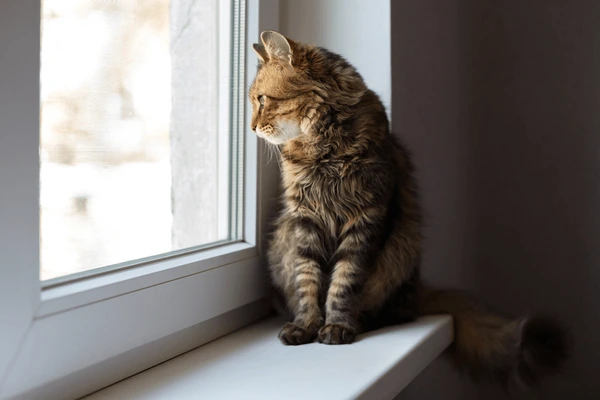

In [ ]:
from openai import OpenAI
from portkey_ai import PORTKEY_GATEWAY_URL, createHeaders
from tabulate import tabulate
from google.colab import userdata


# Top 6 LMSYS models (list of models and providers)
top_6_models = [
    ["gp-t-4o", "openai"],
    ["gpt-4-turbo", "openai"],
    ["claude-3-5-sonnet-20240620", "anthropic"],
    ["claude-3-opus-20240229", "anthropic"],
    ["claude-3-sonnet-20240229", "anthropic"],
    ["claude-3-haiku-20240307", "anthropic"],
]

# Replace this with your own virtual keys
virtual_keys = {
    "openai": userdata.get('Openai_virtual_key'),
    "anthropic": userdata.get('Virtual_Key_Claude'),
}

def run_top6_lmsys_models(prompt):
    outputs = {}
    img_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhAQEBIVDxAVFRYQDxAVEBUVDw8PFRUWFhUVFRUYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGA8QFy0dHR0rKystLS0tKy0tLS0tLSstLS0tLS0tLS0tKy0rLS0tLS0rKy0tLS0rLS0tKzgtLS0tLv/AABEIALcBEwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAACAAEDBAUGBwj/xABFEAABAwIDBAYFCgQEBwEAAAABAAIRAwQSITEFQVFxBiJhkaGxBxMycoEkMzRCUnOSssHwFCOi0XSCs8IlYmSDhOHxU//EABkBAAMBAQEAAAAAAAAAAAAAAAABAgMEBf/EACERAQEAAgIDAAIDAAAAAAAAAAABAhExQQMSISJRBGFx/9oADAMBAAIRAxEAPwDOARAJwEUJKemejZ0WriftldcyoCJC5X0cNH8L/ncusARCoXFQVKROaswkjQ2zYMqV7slM9qjOeSiw5VbHwRCYHMKx6jJCacD4qZLtds0qVna8dEbIiAoqgJMbtSf0U4Pet2Ibcdd3ujzXOj6VX/xFPdwpPK6K39t3ujzXNtPymt/iW+FF6CrPB+QVPcf+Yrh3LuI/4e7eSwxxMuXFig44g0Yi2Q4AgkHkNVOdXgoWe9aVFZ1mNVp0gs2jW2euis1z2zwuhtFrixyadFWGqvRVgLRDyj0q/S2fct/M5cWV2vpW+ls+5b+Zy4orK8tseAFAVIVG5JSB6Ao3oCkDhOhTpgYRBAEQQDhEEwTgoA0kkkE7gBFCUJ4VJeo+jkfJP87l1C5r0efQ2++/zXTIIkikgqHJAQ1XIaIQkqSmFF5V0naFDd+yYU7QgrjqlUllQjATEjNEFQK39t3ujzXNMPymr/ifKg9dNQ+cPujzXMU/pFX/ABLv9BySawdq7Ufb2NAtpF7Hth9QH5lwILMoznPhoqtrZN9XSq0Wy2tLxxYT9T/KZHwW8ys2nYMc9oe3A0OaQSHBxgggLAsrKrSp4BIaKj3sB+pScIwuO/Jc38jLVjp8GO5WB0jqvaBXYOswhtdsZPpmcL+YIid4cOCgs9t0yOsQ2NTumJgcdVe24MVC4LWY3ODcOFsThccUTw3jf8FwN01wDSTBa6Gtzy0EndMhRjnvheWGnpmzdrUsYYXYXHQOET8V11odF4NXryA0uka4tSPjuXQ9GukVa1NMkvrU3GCyCQB/yZ/ounDP9ufPD9PaqSsNKzNk7Rp12B9MyN40c08CNy0mreMa8r9Kv0tn3I/M5cUV2vpV+lU/uh+Zy4lZXltjwYqNykKjckpC9RFS1FEUAkQQhOEASJCEQQBSjAQBG1AGmTpIJ3cJ0UJ4VpepdAT8jp+8+fxFdGuZ6BvizZxxP/Mt19UjkpuWhIsFygrOUfrpTPS9tjSIq7Q0VSpRkFHs8nQpSap3hdUdweqeSkQV/ZKtLLOZThMSnaUwKj84fd/VcvSP86sf+oqf6Ll1Fv7Z5fquVou/m1vv6vhRKXSagt6/ye3ZGMhjXkTGYiPEz8EN08tEk8+1Ubk1adu2pSpio8UmVG4jDYBYHdsAScuCxuke16tN7WuYKjXAFrgQ1+JzQSMB7TGR3LzvPvLP/Pjv8MkxZ22dqPBcKbQ4AmRqWg9m9crfW5rDKR2Fpjv3+fktqpa1qpLhTcw6lznhsbt0rMqWpDo9YXmCXAEiPiDI708Pis/rDubCoMntlozlvjI1VvZl0W4gSXYRLTl7J4Aq5tB2ANpueK7i0YXE4a9MiDDx9ZvAqh1ZwwGuGupIB4GQt5dxhXU9DukXqbhv8xxo1DFRrj1RP1hwK9kY7KRofJfONZ7KTMhNQ5AScu2IXWej/ptVZUbb3D8VJxwtc4klh3ALfx59Vj5MO40fSp9Jpfdf7iuHK7X0oPm4pfd/7iuKKd5GPBigciKFySkNRQlTPUJQCRNTJwUAQThME6AII2oAjagJEyIJIJ6BCeEUJQrQ9L6Aj5KPed5rfrgQsLoL9Eb7z/NatcFZ5fFQFFmZMo3hRklu4FSMfKnE6kceqVDatcDMK2wKSFppJAqO5PVKLEoLup1fiEbJRCMFRAoxuVBLbjru5DzK5Gl85W++r/6a6+h7R5DzK46kevW+9uD/AEBLpNZm37nDZ29NvzlSkKbfccAH+AK5ilatq1hNMvE4WNLyGMY0nCCQNNBEkruRs+m5ttWrVMDG0DRz0xVAA10nIRmMxvHBUz0ZbSwPtwHNHWD2uJFQEb95MgZlxiMoXD5cMve12+LPGYaZdzSrmdKLYmGNBfB0BcdJPkuc2ZsNwcatRjzSDnYsJP8AMqHJjDEHU5nSSvSc46wl2p4CFlXtyP4Z1NgwvbiiDrLiZB+1J15qbh69qmft08h6QNIfVbBLjLiXGRTzMsDvrADJZNAzTDn1ABpB1y7N62No0MNQNrAxiDy3FOMSAGuG4QZO9ZFzRZEzmSSTnGmQA71048aY5c7DQaHThA5//VHXqOYf34KzYjquI3ZDMDPz/eqrVBmAfPJPsunYba2iLhlpV3mgA7OSHgkOn4hZBVKxvBhaw6ifEyrkrREMgcjKByZoaihKmeoXJA4ToU6AkCcIAiBQBhGFEEbUBMEyQSQT0mEoRwnhaIeidDRFowji4n8RVy4uSCq3Qql8kbO9zo5StSvs5rt5CyyxvSpQUX4hMIXOg6K1RtQ0RMoKttwRJRuBp11IbkKFtl2qwLRqPo+GpPBSuW9UoxQH7KVwOqVUhVlOyKkbwUZbmSpWshMklH2zyHmVxdM9ar790f6Qu0pe0eQ8yuJYfnud2fAITQ7eP/D2cqPm1c1snpHVoswNeQ3SCAQJGoBykYT4Lo+kmVgz/s+YXmdxXiOwzzUZ8tMOHY3m2y6i6jXdFU+0SQBnphjONM1lWZwtLDVc6M95EHtOWp7pW9cbGpXNpSqvJbUDAPWghrgBvl2Q0XF7W2ebeAHue1xgPjrOG+N7uZIC4vX8nZMvxYu17hjXVCX4nGWscTJc6Iyg8uwSqDWBzWesikJ1cYwmO3UT++CpU8TngEOGKHEsa6oJyxNJ0GW5WqlpTdTe4y4CCXhrRvPUiJDtN+hK6dajDmqV3c06Yw04I+0Aesd4xTHdCyXHXgfBXqtQy1uUN+pEtZvyP77VDcVSd3KGiFUibValM8DuWtaV8Q7VjTB/eivWDzPEK0tVA5EhKZoaihKmqKByQOkEwThAEiBQJ5QBhSNUSNpQE4SQgp0E9QARYUQCeFozei9DPorObvzFbiw+hrh/CsHa6fxFbZKkyJSWFf3VQPAaciRu7VtUNAlLs7EiSSSZEobt0MdyUyrbR+bfy/VAUYySZmmduRUSgJqXtHkPMrhmHKt/5h/Ku4o6nkPMrhm+xV929/MEJoelWVgznR/ReT31TVerdMjFgz3qXkvHb6qJzU58tMOHqfRrafyJuFpqCmCHS3Iu1wjidOS5ra+0fXEMq08NV/VJxAhjMLXOAyAaIOkyYPDK90Ya+tZubRqup4QXYQ0AOjM/BYTmPBH8RPWIwVSIh8uDXHgDJ72rm1rKt+ZGNtS1FN8QYwtcMJ3OdlnzB71B6jDjBcYxAkyYLpcBPxjwK1duNwtDnAEEYA3eCYqBrvxu7gsy6AaDJlr85O4ESA7hz5rSX4mqV7bBoBaM8LSeJJk/vks0OiQe/gtGrUEEmWuENggkOAmPhqO740b0lzpgjdzHPeqiap1HZq3aGCs95z5K9ROk96tMbDSmKak7JO5M0NRQOUz1C5IGThMnCAdEEwSCAMImoAUbUBKAkmCSaXrYCRCkhIhaM3e9DR8mb7zvNbbgsXod9Gb7zvNbhWalOrag56lWaekJApSiQ9jSTJ0yJR3DAWuB0IUiiufZdHBAZrwjpnJJ4TF4aJcQ0cSYHigJaIzd++K4ZnzdU/8AJefnC6mvtyhTxEvB7RmN+/RcUdpt9VUDQ57iy4bhYxz86jwW+yCmm8pOnRixp+/T/KV46ymKjwC4NE5kkL1r0gVwbCkR9unIIgjqOyI3LzDo5bB9ZpLA9oO85TrmFGfLTx8OqZtJ1Ck1rWBzCMOBxkVBp1hv5LnbvpPVD8NSkC3R0gzh4QTEAZRwC7O7pML2SOqwYxGkg6cOCyNuUaFWqS9vqo60byd094WE+8tr/TJo7QZX/lOgse4OHcWn4jq9yzWteazrXDjwktncWkkkGd3Dhks2s4UqpwSGzibxnUfHUK/s6q+tWrGkTTL2hz6n/wCTCIIB+0SCr1qJ2kuaVKlOYqQSMM7ssTZ3GIjtAWJtG9B9k4m/V6sH4jitG62fTp4h6zEZ6p3EwDnz0+C525fJOUJ4wsqhAklXqTTChtaPerrKZGnJVamRbtjkFK5BR0zROTNDUULipaihcgEnCFOCgCCcIU4KCGEbSo5RtKDSpJgkml7HCchFCeFqydz0QHydvvO81trC6KGLcEkAS7XLer1bbFFurwTwb1j4LNa1UMIGkrA2h0uos7OGJ7W+GZWS7pXVqZUKbn9rKRj8VQgeCNFt3gUFe+ps9uo1p4Fwnu1XDkX9b2sNIH7dRzz+FkBCdjBudxdO91pbSH9PWKfqW3UXfSe3piS4ntIDR3vIWRW6Yl8toUnP91rn+OTfFZbXWdIyyl6x32i2Sebn5oa3SB+jGNpj8RHkPBPQ+rTq19V0Aog73PAP4aYn+pVq2zmtzubuDva2Gu7zL/FZFztWo/Wo5w4N9n+nJZ7yeAbzzPcP7pbh6blbaFlSzZRdcPH13yfF8nwWZtDppWjDSbTojdAxOHfl4LKrjiSfAeCzLkgAxkptpyRQ6Q7XrVs6tV9QAzBPVHJug7lH0Yc0NLt8556hUNqv1QdHq2bm5TqJ4/FTZuLnx6Pb0v5XrDm546o4TvA7cvBcNtyheU3QQ5zZlvWmRnu1IiV2dpdN9U0O60dU5QXF31RGitbRt6jGx6plOdzajTUa0iM5Ek58Vjv1acvHbq69ZqIeCJ3H95+K0tmXdVrTToNOCeu8NnE7QSf0VfpLZxcODJEmDi9qV6fbW7bW0o08Ew2XFoyBIMntM/sK8stROM+vMNo1XgdaM89I71isGIwV0HSK6FR5hhZGWYhZVtb6ncq3qFrdWPVABuXNM50T4FTHQ9mipXVSDl+wlDrSo6BO4oaTsgkSrSjqKBxUtRQOQZ5ToQU8oIQThCiQBImlAiagJQkmBSTD26ExClhM4LVgZlrcVMqTmMp73OBcZ7G6KwNhNj5RcPePs4wxncFXbWIEYi1vCYUDqo3S49mfij4bVots6PzdIOdxDZP4nIqu3XaMY1o7c/DJY/WOgDeZk9wQ+p4uJ7BkPBAWLralQ+3VI7AcM/AaqkahOjSe09Xzz8FK2mBoAEzkjQkOOpA5DPvP9kDqQ39bmZ7p0+ClJUbkjRvUFQqaoVWqlI1O4Kybx2q0buoAJJgdpXO7R2i3MN63gFNVGbtJyx6V26m7E1TXty52pjsCzg8AweSQdzsnbDnNYG64pPP+y36tWi5pxufWeBNQ4eoCY3zwPguE6P18BLeOhXa1L84G0qbQAGYnOwmHP4krLPFpjXJWVEXF9SpZ4MfW1J9W3rEdy7Tpft8UwadCqXEDDgc2RpMcd4C5jophbtFziRmx5ZOUPIA/9fFF0huapAFVpL8+sGtMjdmE9bsLfLla9Zz3lz8wTOfDgr1N4DeJ8lQqPAzKjqXeWSqzZS6FcXJHNVGkoJlGFWtJ3tepV4Uou+xUmqVpCW1LJrSgJQAJ4RKBJ5QApwUyGCnlDKQcgDRNKAFE1ASApJkkye9Qo6rZEDfkrDgoxxWzFA22aN0880RCkKByAAqNyNxUTikcMSo3J3OUNSsBqYSM7ionOVWtfjdn4BZ9e8J3wOxTarS/XuWt1Pw3rJu9on6ojtOZVerWWbVucWTBjPZp3qLkqYgvapdm4k8ysW5fuGZ4Bbbdmvf7ZgfZH91dttiDc1TtTjf4F790DxUtLYx3Akr0Wz6Ol2oW9adGmgQRqI7QrmNqLlI8kbZ+qLHPBgGREQ4jQAb1pXO3ppubOInLSIG+RuV/bvQy/FV/qWGsyZpvFRjSBwhzgqlP0c7RqmXCnSmM31QXAcmAqbhaqZSKOxKrhV9bgmKbozA1IlxPDIobjaIeeuXiROoLY0nLRdOPR7d0wQCyuGtw0wKmEknXEHwOO/esyr6Or8mG02BsQcVZoymYyJT9KPaOJvW7wcuzRQUrd7vZaT8Mu9esbA9FrxDrp7BvwM6xHZiOS7Sy6H21OIpg9pzVTGouUeC23R2u/RvmVtWHQasYLp5Rkvd6OyqY0YB8EG030bdhfUgcBvJVeqfb9PKWdEvVtxPAaAsfaYYA5rANNYW30h2664cY6tPc3sXK7SuA1pnXQDis7J01m+2ZbZhTR2Sq9q7JWWmVn2vog2cohGKDRrzPJNJAUT6nVdy+KqJqnXuJJjIIG1VC9qEKk7aVN8qUKlblXGlBpAUyaUkE+gqhQFPO9RvcuhiTionuUda4A1MLOuNojdmptORefUVSteNG+ewLJr3pO/4KnUrqLkuYtKttA7svNUKtxOplULi+AyJz3AZuPwCgBqv0GAcTm7u0HjyWdyXMVuvdACSQBxJVM3D35U2n3nSB8BqVbt9licTpc7icz8OHwWtb2PYp+0/kYdLZZdnUJf2aN7v7ytW22bwC3LXZcrZttmgblePjtRc9MG02OTqFs2uygNy1qVtCsNoraYSM7lapUraNynbTVoUkQpqkq3q04pqzhT4EthXDEsKnwJYEBDCNrUfq1z/STpOy3bhb1qh0HBLg5Nr+29t07Vhc4y76rd5K8o27tqpcvLnnL6rdwCh2jfPrPL6jsRPcOSzLq4DR27gs7dtZjpHc1o5rCvGFxk5/orlR5Jk6qJ4UqZzTClp1oRVKeqgDUtHtY9Zrmo6j8lC+VKGS3t1QSKrnmFCpA1SimmRUGqyFE1sIwUGklJDKZAe9VrsNWZc7SO7JMktbWUjMr3JKp1a6ZJZZVpIz7jaABwiS7cB/coGUalTU4Bwac/xf2SSULaFns4N0HPieZ3rUoWaSScibWrabNlbVrswDckkujGSMcrWlStAFaZQSSVJStpIxTSSQD4EsCSSAWBLAkkkDFqB5gSdEkkw4zpV0r9XNOl7R37gvO7is55LnnETmSUkljld1tjNRQvbrAOJOgWS55Jk5lJJJVNKElJJARPULkkkgAhE0pJIBnBOE6SCKUpTpIMydJJAf/9k="

    for model, provider in top_6_models:
        portkey = OpenAI(
            api_key="dummy_key",
            base_url=PORTKEY_GATEWAY_URL,
            default_headers=createHeaders(
                api_key=userdata.get('PORTKEY_API_KEY'),
                virtual_key=virtual_keys[provider]
            )
        )

        response = portkey.chat.completions.create(
            messages=[
                {"role": "user", "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {
                        "url": img_url}
                    }
                ]}
            ],
            model=model,
            max_tokens=256
        )

        content = response.choices[0]
        outputs[model] = content.message.content

    return outputs

def print_model_outputs(prompts):
    for prompt in prompts:
        print(f"\nPrompt: {prompt}\n")
        outputs = run_top6_lmsys_models(prompt)

        table_data = []
        for model, output in outputs.items():
            table_data.append([model, output.strip()])

        headers = ["Model", "Output"]
        table = tabulate(table_data, headers, tablefmt="grid")
        print(table)
        print()

prompts = [
"Describe the main activities visible in this scene.",
"Describe the animal in this image and its posture.",
"What is the primary action or behavior of the subject in this photo?",
"Describe the setting and lighting of this scene.",
"What emotions or mood does this image convey?",
"Identify any textures visible in the image.",
]

print_model_outputs(prompts)


Prompt: Describe the main activities visible in this scene.

+----------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Model                      | Output                                                                                                                                                                                                                                                                                                                                                                                 

# Testing on Handwritten Text

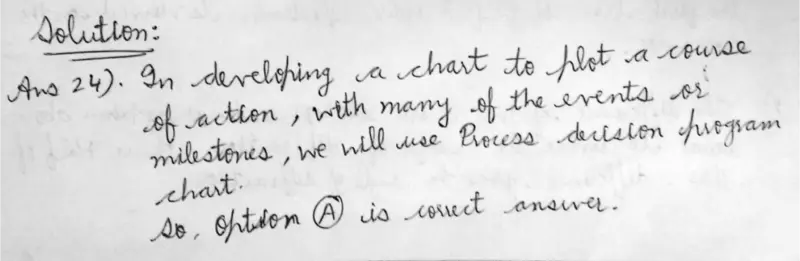

In [ ]:
from openai import OpenAI
from portkey_ai import PORTKEY_GATEWAY_URL, createHeaders
from tabulate import tabulate
from google.colab import userdata


# Top 6 LMSYS models (list of models and providers)
top_6_models = [
    ["gpt-4o", "openai"],
    ["gpt-4-turbo", "openai"],
    ["claude-3-5-sonnet-20240620", "anthropic"],
    ["claude-3-opus-20240229", "anthropic"],
    ["claude-3-sonnet-20240229", "anthropic"],
    ["claude-3-haiku-20240307", "anthropic"],
]

# Replace this with your own virtual keys
virtual_keys = {
    "openai": userdata.get('Openai_virtual_key'),
    "anthropic": userdata.get('Virtual_Key_Claude'),
}

def run_top6_lmsys_models(prompt):
    outputs = {}
    img_url = "data:image/webp;base64,UklGRho3AABXRUJQVlA4WAoAAAAQAAAAHwMABAEAQUxQSDEAAAABH3DV/4iIhalINoyORh0l5fJnI/o/ARlHHP7jP/7jP/7jP/7jP/7jP/77MfFf1xEXAFZQOCDCNgAAMBIBnQEqIAMFAT6RRp5KpaQmpyU1KlDgEglpbinRmyoBNiAdvsQL5jJkbgOWhxRPbQwz9lfVN8X/lv8N+Ynor+N/Tf33+8/kD7nNhDqQfLft5+0/wHpP4W/Kn/d/w3sC/kv9D/3f+A8nfcuW8/aL2CPb/8Z+y/jy/9XpR+of4X9lPgC/nf94/6vr5/1vEX9e9gf9Z+rR/o+XX63/az4Ef2GIgECVRc3bFAdbGhKde1RGIHlp51NTlOBZETe3FdfCRxVj7kq9VLoFErH28uo3T6e8LknUWQKfW6trjtryVguOSMavmO/xnLY47e3vgKNju79vYTBsu4MZoPZ30iV4mDfU+Gj2urs7xrtdI2IqC5maGYN3fdPObnwnOKJPN84azAvyaUEaU+3ZGCEWz/w7o2fxNWn7gllowCDQnZmEfyXHgMgNl2v5tpsI+1xiEY2pFsTO6Z6J0R7bB61plurGOmJVZx1W0u93oSYobww6klqVH1iMUpx2ZZPQWsQecU/4y9Pa3A0koIvjNft9G8tZt/TCVNowdUNCn3rhDvlCT+HJXqXhIFhtanqlzTJCYoi8/DkQt5bsxrGaBVjD153Rm2Qk3qNSYUHSZl3EU4P3zRRc9ryfu8x6HxTWmMJEJXhgojJVBWNB0gGhyzIg00OMmd04hxdfWYCWA186NC6yJo0AA9lQ0S9a61toodla4RyFfqIcH8jm77zaxFh+eAZUVaW/obq2Hmj4AGcvWBqqrXyrZ+AYSidHz246JeWU8eTzQqTk5VoAcabvzg0GZYBd9NxReQtr9NS2xEOETu3MJwlfnRBuO8e9sv9rsYLU7QiVqev+koWdejflFZAz1YiIA8rDS2haldTVpN5EhkKONoS//m8+y+EjTsJ9avWTWiWYEyI002+Q0fLOQIW0qfbcYOg7fWEliHtNTs+VmqqngHbgzuZsCTfsQnwU/ZIzHKgenhwrgAwQbBD/qf8iTayuSprfzc9IvIu84wIxrSvvpLwpzunN5mQhkiG3rVZKAS+r4MQIaLJOu/FhywjzqKkZzDdR3CrkWEJmUv+gin6942q2TImyGERG+7jCkvXZQoNFRT0BewrMui6F4lzJGjIsIlsUjeub2IX/wqV5sq5KIpjY9IGg8lEARGbBqlTFaEZ8itg8TUNdjOj2/lfTYxBqiMizefwEn4gAqiFiO1yZIm/tzfI24ODjnBt6tLCrVsEnY9qkMPS8AnEzlNmAsQvZ3tP60g62te1AYa8gMIKbdib/LPFOQ3xTg4DynGDpwwVkVAtDTp7nzuV27bnYGo9q+6+SOsERy5FO8Cj+86OqckAI4lIqQdMvzS3acnPmp70k8THVXuHbMbZwC+XsyW3O357/n+K7knhP/I4m6CTHXKpJ7TK5g4FL6zzreBvYFhiBNq6RqVv4gRKlOdkLuJ/e29WMxeCTGCIEZXdIV+9ddAHauDsFcb5oDcw0MTACvkLSVeGtXcS0NvBLRpaz7dYrc5cXR71HYoKsOrGY5oft9Ihj9q7yp5qv67YUdFFc6kEsewdmAYvb1wKMyN/9qzx7HYy2U3TtggD57VKGGv1NAv/dfjddMpr+kGp0D/MFMctczgiyGrJA8NeznOPICgS+jyD1CsOaKX40Y1C0iLvF/sakhYJWKb/9YNj5zTGoMHV8/FynIkq/wsA0KVE/Jw/tVcCjkhEYoMTnqy4bfo8J2wWKz+tcDGiwrTF21/aURuB5Ss8VtoTt213zSiEST6Vunn7wQNYSUZglaKu+eU/f6NIBCEcKIEGeW/eb4gnlZ8QpyQMrQO+8T5IODHb5WNgBDr/n9yoLRZN+qjyZiI86909dsOAO2FUaPZx2NNVTzxFdYaW6goWB0YsBVYb193fi4CAnKQzGxHHTiuEjDJolLDZxsCHd/73jVjQ5+DDogxRuXIbZeTxjsyOrzjl2YOKJkSRR61MhlBTABmfMiEWN6sh0FmifTzvkWO0yHHH+VG6eekRvjR0Fq9ErVT4I4L31PTu+wQ3zQHZ23oCeup1LVUnOs5r3/C2v51r3tsc4MrIxJ7WNzsRaIBQEz6+qB7m6PHmzfLnlUCIwq2mbjuE+kWFL2ie28wgvipM+PtTfLtZIOKsk10DMJfouV8nN67w6RfFrrwPOlgA1JyV0mRjF0DUVMwY3a1YBgIF2am5oNOIdymxE+6Gk6n4mYxgyLchvfp122tw1cb3D0xJ/pBx4LbdIxwU1EFQMBIWUCTFU0qFphg21ks1YPJ2OudcPUE23nxw8cPqThhXsdocodObY9UuuFWRaKZPvjrca7Zug303/A7arlzW4kQTSKweRBQKZmzgRd3OCTkd+YEP6Eq8aAWohpsVa+oXaqX61K51NdszMIqH2Ue2UVdlNiUth8/JPyMB4Io/GcpKBumRz5PRXtblZX36YohRXeYPQGBP5YeWF1o+OcLmswyndU1KI/5gUObCKhNpPCFHZLWzdt6Ih7F3BdRchER5WrL5z9ok6rKZ3gFW+zxl9ooCqLxARoPegwuEVTD5y/fTeH6aZQUd8BPxgMCixtyp8GOZg6qrFhtU4KaX6enknI/+Kq8ojXx4YTxOgTNS/6kY2goeb6BdFHT5CLDlCoBBde4FVQRZfb0IxdZtC62Sg6EMhYPNhoYPbdqyJEQTZK8qq+X8zUqu1K2lgV7OIeAy49kACMfRmuGmC6kkuPOMt1o761ZbTcFuJMYiklzlmLEpjtG2G7Kf/L6YWeeVT3ld8mGWOkdvqPiBfUQt2m1IIQzdyud+LScYPWJsV6IJlZWxvIBsuiqYWYACitJn5gftHYEoCYMWqpzpsIpNsGCKoaiek9FGGxkrJ++2P2sqrPquzN/SMgj0Yh0gxlvpoYkK+zp/OQSBRjNx8v7vpvWHTI8m85roi9szl25A8LRI3NG1zdQ7Q+QdTKBsgFbbLE702XhGAAP72idn/WwdY2XVUYDzrIBElZx67EaLzZhjbxsBrXEGtxRBaeRANYxa2ZGqA00TecEpEysaYfWLXVWLbUMdZUEdYQ/3AHnbDlmE5pXW2a/Uf5yjMK2FdpStkTjXlV4C9F7gKXS02iy6abPCTrUNinRDLoaVY7uwDAL1m0mOhnS8tvpUuiqdPwM2ytMYhxT8VAv2BO17udGsTalDair5diWflZu5R5sQU7kY4DBsuwKndpVv06B4vQ7Z4hfuK3fFO9iMGcQw6l1X9nAUD+TYyavMwW6YOfCoImqKEiXcwobZFmbzp20TGrawAzdWOxDlgvbIKmZIeMnfnwiXNpP3nBO6Jg65HP06IVp6UScPlxqhYQMgDAcwAo3ji5yGd2Vqng34dDHdmpw5VV++ZhBV/FTCWAwFMhm/tqbObntHEyxzfk2glB+qPJdtI/BPLVefgByRvwq4/++xzEdxVv4U1UKvzR4bDlB9UOqsge8/rIQSVWwtJD5N/xqX6QLXmlei5/ho9Z8u9EZu0dSthVHtwV4/ck79ik0+Dz9bcxqpM/UU1cXYNGXt0l1bqYo5sW/WEDip6OwrkT73p3QklsIgJv2Qj+3S/1xHl7fd/NKU/m48Iejn+TyBh8auSS8FuekoU9xYbsD7NjJI39J6XGZYcCrN3L0NwEf4XdfU//9rIAE0KV5ZJe3tsphAHYlSsSStwljHbpJFvmqT9HteQoYwjXDn4BAMZF2aC6CTU8s0lhToeoo30WFkH2vpQcR9hvmbiCH8M/rGMhnYzlX8Cb414mFD/gd8TYPrf4a72bF+7hQ+hlCb56TjiLmfwotpIWX7bRIEmEcTg21Lq7TUFQzMgij/VF2Y3qETllB979+ktLE73rX2lOBV2ljQr7Mr9IP5Yf+M9TA3yi7i59XN+eXFuc3z23EZQcC20F6ybZ56KfIW91xev7oxIi8LErm8OBd1LRXtoXoXuRBSFDtLdAmL8VJ0TKgSuDXRUL2H++F44AibZgRpmNFqK2eDl4gfPlzEQIdcNOOb2QBDRWh0ggyzgh35aWQLYuEdF29s0eljwV5W6SD+IYOK+dtyfueuEEGq1hhbezBRBo+adbf76Sc5qSyQiUuDxnsnolvi930Mp06hFqX/BNYACVkTpCgkJkzmsvfVSe1gX8piuHkJvdyYKjtorWsDNCruLeKSv7McEFO2JBMYxFrNpJQy0MNRiF29bVSMP+b7exP4cTZF2GsjDIjylnH3l9+mfFBCB+2S+ALkSHIjjQhyxC4GAIwbM0brbBagxF05cnj/YWgNBCfMxN5bwtJxRgRWy23vqgQt2YA+3JwFryjHDuBactc3n9kXgbNU2CFkZB1L0GnINuENq7V09yB5zaFkqe2X6cthcTHvqvvSrde/n33gQlwSxSossevVuxRGN6TLGrFocE7EktlVtMcL3IXCAi4fQVSG4m9yQb9hJ3qwWTp+iOEd1QcTrtYb1YyQNkQF9j23BwN1i7+FX5vL03TNbBRncHKVdmY9rmhrhRfiYMv4vZn6bohMY51dKX1B6DK+Kez07zF/V+wCK1OjJsvGoZU11aj9S9MN04MmJ9EwYCKUihnGpBLtRBtrU+4MDmw9DEIW8UhRZM+X+L/Wdl8YpPFfrzA+bkOgYjwPWHHZWQRyiKufqhJXakNDZaLUfVb+KSnlyU/SK1UQIbk719Mqd4QUnf/LAcObH0P/NktQdWr2rUXaWIFtOvFXKWiYBf+K++E37Qnflt5c4OX0J9nwGblM2FCdNidzLziSzZoWQ5lnQvlBUQnmmiqH0kTWsQsQYlB6+plt3MNAbVtkcE5S4J/5HVULdViT0mFMs1TejVF70hVGoUV1LMnvKm+zw51wrdhAieNG7Fh2aMAzi2kq3+T0X+7dkoUWUkQr+g9Y7Mpjz/fC8up1KlONnYPFHfn0VKYvhDDAx/rNX9bvWBSHww0yJQs5JpMiO1RTufhnzwi5eqFsD9zq2ipl8+aP0FHHaHiaT3JtkdoIYy5aWGqs6sMpCdYqQ2vB9nRdrrIuBW3yREMq0RcJzXeiHBWwBElMNW2UdLhCl5ExGEHoE2joapFoNsH+djnx9nQ7SSjoHN6J1Mty3+GFZ/GuTW7VffZMHUOJTjpaSVJbgzziJVzPj1ELTiQq88xpm95ngQ9nNVi3TpdgjQAN/MSCVtv3xeymiuCt3U3bUfVOkfbqDrJ/KfL6x4XoQB6HFOWUvbww+/2kmYgSRtkLqWXx3gRhKR7wrVe6pP7lOeKbPKxwJ3pC/4DPPnB/KJwVGMDsAvt4v8TYI8f+DvLvQdb2634dwuknAl2yyP0UwTqEAPpxn2Am9ODjHJJee/wjIGChs64ni70O6PS0tIBnPd9Tc/YHrPghse9Tv5B9Od58shUF7wb3JAdYiQYHf57htTKKmZfgiO1e3mis6WT7IuYbRJYPKQsG00GyQ1Lk1ZsIsuGtLTAf7QFafcM3rO9BejPqEJbMU0qiNpKIzhwmxXx9wa2sRKkUcDYWqH8wU7xEbneYfcS23k7u0DxLPLOGeMRMR2OgaFhvfOaU2XCxH7SOBRoP4Wv8w1rIG4u/MKbIrsszUxX3q6rfVhB0AWH7wBlrf/Rj1b82JkEOMUCI65QdannoCLNPMO0fifdlf+yVuq+JaBw0ghgZztNma+EylAZczkmyptaFuyW/ClNJnjtkT+vwYjiageVYfi937NMsEhUWhvyjQBuGsfCMpgFOlkk8mLuxgC4ynBrXAugChi2+kDFS3yiypfUpLrEnfN9/v4nRytBPAktBPz0tPGnI94LT4iZHd1E0HUZ9qOvKeWBYzv5k6nt9qUItots1wMnnOkBAGIM8/SKOp/xRDWBDQbDrykQBq055pFqDmDEwkgC1TxU0Y/hkQikQJceoLxtUb25zV63rUuvfaGadlAwz+wDPo4UmIsRRZANQdcIK0kZnet+18mGo6NeltFXzgQP19sC7JZb+16V6qQGn+nykEqIVifaQj4Y20Bc44eRksLOaJaRwx89PGzx+IcICP9keapr4Xlz7pAjTz8ROA96kR4DKy5MRhflvlrh8gfUGEuXslDL67pcLTVri6WwfkD16zcuho92ThnGzwqs0B+UfS+INvUdHJ4na5diQAxz1KxuT2ZOxWM2d8KE393WOMLHVk2TSqcsRh1CNM5U4Zkry8fK/HHp2xxj8IP2PZEn43WpNXzL9pzXY5JBtrsSZvI8WpQEDnUJgKa45ai0D6Z4qQ8dlhI4pyLvk7Yr0Sp0QPtDocsvbqapxQ2lwsnRcuRWvU79XnAmf6UBBjbFvcf7edvQhoGXfnlOSk4Ja0xsRH8QhmXF66u1yg7XntDruEcpaA3+xjkz7RcfiNXj4dRJ2MviNR8j/UK9O5R1G6ORTOi6da6ngFKKvYpsn07zEDQI9CSGdICssoKrbQq0HqXsCNO33A3PYd9s6egd7SDPTMvN89xI813GoyM3M0UVrRgrqBLXj3LzXDod83FwNyIFCHwCtUuXC5JuJrLWN10pMEz9cO3NT577OFnE/qPjuxuIEy4aCb/b3eOpmG+GwyfEQDXCQO5EJ30g811MMej/lsCEKiMyK1tIoxaFk3sekVv5ZAXMg3maJc4Q69CS4E3akdgoBBrqh/Of5aoaog+TSgTYedPlbjkUNyH1xCdrs47NnOzvcb1hykvHMCHcq8OuLfTBV464JPTheoDRP+f3AujvkeFXSYk7jU1ByhwqjHRXqXV/FsZ6XD0WLfnEfXqwYtARo0Du6fzZbry7XemUPeKjQQuREcqE4pIWzTHxvPSgIzSNz5BRbLNzJ34DdyP2EmqtuaTQ3e2L+6atojgmEpe5ryDKEukIFtmdLrInn8BUrDDlQCYvHpkU9MhX0ShNDqjj2Q8K6sN4Z4AH58+aVPtjKzJmc5NEkEGer/GKorLPcu7JCqkuOocO33JFDVyTMOnlyKHtBY00vO0/U3Atdc0mItKUP3Ed+cLABKRM2FjizDw2Hn3lbFRx3X7Bc5q8IdyfWSWq3yd/nR/ql7Bbx//b+N66agdmCSix97XM5S+45TAFHRJLtiC2HTuZoZhpRTqR0adTKXJOBZnSYCQ4D1DGGe/Ro46fRzCVwKfnOqWwUzWfKnwkPWqTYDzwbRwCcMdAU6gfTXo76Oo91RWZvKFuQbZ3TPnMYvyaIz0x5DLz1ONPdcijMJ9EGhVN/z0jAGBPf1wjiM9Mkcey6/Wd5nL9Noik0R2rI4Gq37qDRgfFN88NrwltTey3+2KMRow9qTRYo7NzVLE5rQn9Yo8z9sqnTeS1LqbIdR8fE258Mtntn6soFSa+udNLYw7nEu9zen5z+4pHWQVC+GGp2p9PnjQlwpgIsJMVmpXIq3SUMeWZLvmrTwgEM78Y2B0LOYjAaZm9wBvBe+g2RNrWpjcjq3NBVe7UJT0El9/Pjdvpik6TCmVTnTGWBNFh1G9S2Vt9IRY5lDZqt1g7iFASmisqhKsoAJ4bzDagmmNFmnIQxqqajHhCMfi+ujJERtIeVuYwFXEWZoff3C3Iip+90V7BTiuXj/gGsP7oPQBS/rKd6db/xlWwVGCDf+tCvsxmQbjtEWJ7O4YHlTJupn/BAvKQ/OMtQIiDojUBB1wC27tGUuZKZOktU+3/WzBewNa9/VBv9Z4mrJVpKI8wURDFzJJ5iV5Bws7+I/6dTiNAz1KKpCiqI8vz3CcXeCvanOkJRnVspjqvKwHnrNOKDOYglxvmCB/8dFLUxkANdXWh0FdFSrHiMhSLIGYOITnyTrLg5x+X4yHrYYxLJHLzyetf5Lixmedmia3DHgJSVxrUFJHD5iyUILxPRHRC/V6t+Pb52dHIBPI6EIvFde1IvmQBv7VULYtRCf8b270AZgrFUrlWzMFrASQ5fs793GJNas5C6PlVPQBApXHk6zITB2REsgVXolDIzU0MyvjIh2q9J30Zufd/4eg6T9rSivDmDnG0QDFeX8Yc/XpgsafSEJDGn3SWCcea37iqydNtxjk+eOqdjgFTrjS/KCL92HGgNmMYAu/ZimulMYgWPT9SsHtbgZYQEniMaZQjyql4nslCShGRuQtAHwkUoFjri7Lqjpgu6RzdEXlw8+a+rPPjzE+0DkTlC3jUp4Bg0GRskQIdOSLpbx94ewOjTFFodoHLEjcsB6dCZ6/Bqc64njtHgeDSEy7hzhTMKX7uZuFrtF7vY57U62eYF/0z9kJrQOrHEERDxgS3iAv+HyQ2VuShhiOCgHSVkW30j/GGxB+QIz2lnFxdtOgSJNX5ew3yIlpK/l4wlUg1SRn6yv8tMDkoiinZlhuJdFRGTUGfHkPnECo2b0lctStqr/JlMiE551JlKuptANYpvNYzH8c7xPDddQdmrQq6APZIrirVwPV8bPQ76hAvvKr6uZG9Z578BvLz4pJD3BrJqPM6KZ3GfgQ0V2vVb7V81+TrYZQ8IUbk/4zKR/4m9w4YfhYhy/25jHdqRg74i/6uhdiZGaqsQLbk+xaL7Ijl3JYu2JO3E3tzkveBnoPuCHH+vVx3xbu/6DCcIDqjp0bivdAQskA4bUL2i7ImD3Rgsv+pX15zhAdbHfHSHwJ1ja9Otykx/NsNJmyRfgJaV9n0/w2NZmyZfqI4x2qdyrP8cuDT4Cq5fcFhzC6p3rQgKWBIV66GH6lTzMvBIMvEYZ3PCyyuGbylVeKen+OVCob8n7+tl7yX9WOKs3XA4XpKqmZRPxc6ytOR9vinxdOJADWji9uhbpzxitBxgu1/hfk+DT38AiEde8S6Bb4t6CIAk5mflJwQSLVFj6ShSVnSrDxd2tfqH/ibtpwv7qrOEI5yfL/0YeYWqBGJWWuLMOmFOcFC1Dj1QZ8u3h8kg3DHDZ+JuX4lfCKgAHbD0KV7xE6N53SlujOy9+CkrG43NxpYE/u0CWyDIj4KpAcyCoSHgtM7+EygnIXvB8dcDT+2TP9Ij5YH1IhpqlVE4+TzZUuihmCdRT9ozUj5Sed6gU+64EhepKOTxd4rRTdQlSyj55tHM30AJgp2o89DtydYp7YnxHoVcqTZP2ckVwDq4T0TBSmpEVMQiw0FC0pgKdqEaNZvMYvprqMCsgrz2Dn35JKWhUgXfgwNZtTcgjf7k7o2i82dyFJH0Ws78dZBBfLiFxtUQH3hfVbng/Ai5Z2EkDkXi3Ma0Hzs/V/1Z7FitVFZwDCevhsbFmyaCWUxw9jWdCZVjW/ztcryMIH1ZuMqeOe6r9CYG7u3bDIyXGvKOWNptyMSOVKbc394WfyNSMVxZhBVn9ssBgLxkuGtrboTtoLCpS3xkXAKKw7LJt95HJL79Wirjfqn15uIHlMjYKI9cuaiDhBWtN5cNfpcl8N24eGKKHtpZmVmgfmCHCxP/x7/Y/8swc+0L0HHUoTykN9zJI92vydrOyenm3qPUVOEJmbUloKGDOow2gwtwZ56DWiidBCNliTig36sS9ogeYwtchLS0feZA+KI0B3Kk1z5Z1GtmP0NBlH9ivZD7leukMtdbTthjupAmSUfVa5gI08UXRQ8ZefJT+PhYkm9rpqR/FzUFYKbZgfWbgAWOfGt0QybREMQq//5t53rHQXoVkzT3fqsbF/DuV72AXMknRsuE0YDfKWgBonXV56rqZVgX2XVQ6U8s1y5FDH1Brrs2AucXwpsnssnNjjx91Oy9lDDErgLDGMSMJP/dXF69SpGv3U4kuPUR8VP185LGJ1lu6s7sMzyB76rOZvU5Wxf1V+rBTwLnVD0iFDhOfi+1sXtH5ygc5Znsw8zOJtbXIkDoWk83xyfXQK00H/T1fcZRXUC+n8aNtB3iW+QRDY4iS4IM30ELhFkjguWYAOtnuGGxcU/O03nIiZi2NVxAFqrsSkFN2J5m9feh+YC9CVGcoyKJLFtxzyJEv10ranxKL0UGDfzdaxcJSStA/Ts6/YV03l8qQ3wdQHy5r6EOvqcuQ9dzgUn8Xkn59WWdaGt621f1nHRmBz3w1I5e/W7uq1QlLriH16pmjmzutZfpEVtGPOM+0xOXzg0EIDmYJpadz2wvAgiSxXripbzb/5vq9aGFBc/vc0Rlj1dazZpPmHJbY3/ZNpxwjf3UfSU9ROQAKNHEBRRcHeZczKf2FCuUyBrOUaC9AazIVIuZN3ZgCcQV4ughznPqrGQjGV1emaIxK5GpFTL2lRGvwijSDCh83ciAqwlrODAEsGxZJpvwEabqKl6cGFIHYfazZ4a6IeMW1MxdVUYmwdYAT0RoeA9szRvgDpr8A9L+vWZ+A4rQD8t5eiMzqILlv8e+smnKdh7UDfSwLld+nhzeUr4qkATnJI3VfNxoqegdXd7lbsEkAKpL6TwXjRuTnEQYVfrncxjEivxnDrAGg4+bic6Xj1xr67CPtgpZpQwNQC3bUtVsXeEwnlrmh57PVQ72rSmThvUexkteO5opnuJSAohBCrVpEh2k+H8mggN0hkOh3tY1qY+pOTabzecpDzF9ViykPjsbtv6+CkINkZ9FFY8mkHAidzUznqQnfEH6j22X29Xty/yXnyBN4TSwYggCXNqF0qGmtsJYhZa/YunUW5s44xZWSHdLdxi1IF75rXKCTPrh924OCgkRItZnSlc7A22NWfzzS43P0zg9xNMECPCxDY5gYF+Ncgy1GzD9Jg3iMhFqFyb+NFdQzo60WBSuDbniMRFaFmTYs2q9qycwb7JgemOxyJCx1G/TsbNLSV5++nQBSrRnoLt7FIubgFn8LQDxl3TgRE11EzNOGbdNe3eU+fw1C/7oB5r3MAi87bd07ZqVNrDPx6ayK6QSfyiSE9I/rD3mhktLpKGiApe8/NuADLaIVFl8rcZjnvbXJt3oSxr0D1kEiHcer2tmVrb6mhgiVUKOT+lQJ0qbr9vXjQ0aFZN6SZlZ9NlfbMlHFzUANF26HuoRSGf6K1FmHHR8YTyzlJkJF2ir+YiT95pDQjNYyt3boikAlAHfb5mDs5QJgsTTXFBPFQGRrv6RKuuazabBW4IeIVIVvEBdWJKp12vNsjJw7jDBG7BI5TlCjxLmgu2t8pNxutChktDl7n29kPOz2vCs/iKakU5uOL+AJgHEBsZGKzCiWqCtPeRrkzsv0qgo3xgqLQyPhbf4uWVMMFPMW6JKOozKkwLDqZJ0erXJtALc9/S/KskY47aHORa0TyBRoEl7j3pQA8Uctb8akLuMD95i4YZDVkE1k0HVusdOcDjUYnuhdXYsKq/DOPbbb+N/hy/5AIwd/jgj7mvdtBu3+2g8VgaHEyAbxZifla5z9R2EMWJwqpPIAgM0hsXLbt/y0XVugN8YxMFR+NUYXV2kPlL7jbILnV1F3DzVhPfyuEKoOyMzJbCqm9GluVgVpZD6l/wcNrSkkFXIRDZGxEYzjG6oYnrkYKZ07MLmtb1O0cMaeaoR8q0e2oOSf1yaZmHMaCrMA832QopDfG6PuCnGjP5HM3diNPKH8hB2byGBf6T/v4Q2MKzvl0KRBVtSexpob+ATYOmlIBx4TNTRDvp2PeV/eGV7LmVSmHvQx5RiSsq++L3nMtjt/HEJQx0WRtjmXAwSNunzp7Rv1XWHzjGfynP5WudtQrGdQn3bWpwjMSSUAMbuv56h0C7dPHOX0uMOqXvXjWKGXmSzEKuabF/Ece+SCg+AIawoU0Un5SwpsZD8jrX4heMH01h1/bxgyhHlkRMkkIwfjd77ZOY1EkJHUCNTQ6b16Ul8SqAn2bO9swH+Sc0YGF7Gygb1jerrE4xoFTak/hI8V0IQ95o02qRjkxtvX4KCBgpIpeYthOIzTXZXTAeogUZxtDRH6E18gnY8uDli6WqJR/HjC0zwJ68D+7wbBDvmTXyeYa4m1PN8BREW7gdUwxHOxN8zd+O08koyfumSJt7fREmKGqljXiJnJYBbwuKjNb+iQUHiKdTVtPRVyniVC5IsZIPuiuH02pIQkx6mB8655u2asGdVM6pljCb+4bUMGmWBPsiMTZTbzYYa5G8NlxqPnjTCIm+cwnMX94e+leyUM4B1ZqQiE5G9dFnjzNUzRgNpkKf1DyEEFnkLAb+JoV+lZHDzSmIJtkNT0E4+8PkVq3VdMyiZlLrS3hnG5bK2CBe1s+RPLqYB4W9bTIwhXN3cZEFghbWAt30y5RIQLnQVXQP2FTVPajAujNplOH5Ihyi47e03Kk0dj8BH6ZX1HRClaPP2c/XZG26LNA84IMXWaNeergfFbEjfLo5sON+Nj9QvhEDUEwNd98pgog7jOLv++h80xoBOfIjaMMMBvTiTEu5dyDMO1iR1upPGECra6hpKgs9XnCtISK0bG9WvbjXNzfOKREImptFDOIg0gUuSzdyMBSzrxV3cA+VvVy06FB1/pTGx+CWtNzX/o5LIvNU+WaPl175pH0BuIkHzS8Dpbf0+buA0PLm9goWaklPDTbvBKX7TEJLwyWvmhBcKLhQ/AuQO9RXHJWLtYYiEu7EX+UKN2iyzG9L0vDDoHRiGrrqjdD/xpvJ4ePqLAik92U1NPD0Nf03uvYXoNEGpSHyU511pT7MbwrRSwn1IoqMKnzxdh6D2ByuYYhj2SBqoKNNyAHJ7Tdp/vflOaApsfcgE5dyaQsr4wB9Qz5ygBj5aWtqwq5qRLvuQJvAQ+dvCnw/xHicusrofdmAiBDlyZ+fl5jho4av+oDIwDlPiZqgWrimvhzEGV9LaWaLfdEcO7K8xtFt4NpiH8lkn56vODqu6UWVcdxAXPiF94qcSgQ9Ro0EieQZdWOGSeDnaw9ygF8PPAFSMbxc0MHAoZ/GbUJpEvHX9znewiX9hErjJGKN7EkMIn0UJYOFO1f2QuamGTNGR7r29EsLGtCBMU9mZ1bdrEM/ldgpJi4o/K/YQJMegKJb2A8fS06IeDGJaD/Vrj9V1Q7BdC0ygr0pRhnYaNC7lu0NKeXtAKgOKrVKE+atuHQjikC27VCi6Ptu4bmrqKuPbtEsKSEDiy/2VlpmPTELmizvAQtUJ4jJva//lvLkdC1BTkNY6LQ9zDRRfrLT87sSMdiqaCc8pdP/T8/mikCDz7RllkZmzL2DZpTHDkq73M84SQUps2lbT38NLYqNrBDgEvkaLX3ysa+zYIqqNf12m3RzxIKuloWcwGWjEDVSzNeR5z/yczwICWeqFWYGCYyIux1SVmDjSnBJmSxNSMeTVo0lTgjES8Dtk2HM+7zeSxpDMudBLARN579t7iIGC1/ZkKjiYv61nROlBGjO5bpW54SO8z77bOlOgSgSgbIATz6oWGtHoHe55D/fYWQEdSthFtwgUzB1VTalyxv1r20rW+PiRsOVT6UuCOhwr0sJuvmZD1OMReLQJ4OJxLpxKT3yIB9zo4tM5yW44Whwkp5fIY+2Z6KyoWt6P5LFaSXfhzZaTcBikEoaWjuQAbXQsHtSZ4Hg0bk0SqFW0ctE1MtPtNRRdQS52aP36OxmNimqHzL0aD3rql0RL5hcAWh3veizYOwJJDUjS90ypInHh1tgzJbhjpGRwgF1vkwjhy2DXApFR2mclxfP+4SV9tGAmCbCcrg3n7sxzMSTHKiwnnZYqRrNoTG2+NxJFXRLQKOixE/r1mYp5LctfGqiUUk9Am1fUt0nHaxtu1YiQDAOmErdAhNbSWaOFkPg+ZJkzTIqpQoezHaZWLoWAKkbIMGdumqFcwFbR4PZs9pyyTyM6BJFd7FkrrKxUSvkf6AFqC8ySz67u7vu68tffhPPrcqNSMpYNXAofhShg56RuaNivm7A8LgvSTz8p8vSaGpWdPzAu92nDhQwujFWnhEHsnZecCV4HReuw94S7OH+uthAlIRYOrjaZSvALuWlyNI/J/83KhHlkcn5/7s8GICi+dL03RIxqbX28tDTa3GPe+nv6Ddz1YFoIk6gB2cGWnwD+dGVBBsBqNIoyYeyBD1DgWo7u/JjeC2GH3DrascR0DfSNMisRBo069C24TG9zkARtFRqjQP2FZrNKKrKJhMADSiqOW9EoPdpFp1Yj+PZg6DMgBazHKm0sOFiVbBapLbbcNZinsjPyUITWN/OJeHTMwx0EUR09LTrUdjKsc1+ZyS7pTYbsYIVW6oe0d2QuRmvrhhLo6bVdtIfBS0SiJn/dkTfWcBiZJuffR4rqbJh5/TrgwMYXFLO2A88GMbfc3cR3Oc8N/JpmikjigWgPpziZbwK5ywdNLoa1EMOcjK97l/9tCjQokvS0mSQQ3OzIRyMoOL+TJQ1GmRf3kzs489lplDrVME6TWGeolvD+fvRVSVNyIg4uYQh/GZ4POw9D7Oyd4iGa5jkH52yNa7PS59+UxXUAe3rk70cp2toXkLNt+QJ0tKlfPFg7pBGe2AydPfzzWIYXtAchIJ8htKxwecFOJqwwxTl9Oz+12/Ne/hzQExoZofTQNu0OATr40o/xzTXU+BavmZF6Q0ePN8K4kp5rfaqwGRQFFhKShrQ+56BQA7K93nMgeM1t/r0njNBn4czjDgqbKEPiYdcInKOAc0Ux3ipTfydoyifO7H4Ep/NK6hswksfpNNyv3yo+FIXybWzkoTQN7rZdc9TgQmslfaQ1vsxRZiCFhob7RnDmEJ8DgNYqmGuHbOhLgVtzhIsDQEDYBgLmm0MTjXfQFulLKfhohY/z+PAH3ftWyo7AnAJRsX6b7ou/3/qeoCS7Bq7ozODWBBdD8WERkx4RUfMh9DFMViAQK112xCNi0hqlTDUDbtqgWCknvOIxIoepN+/zvz0ApcHITURB06pqe9JLN3dL1hZF8r8KGANtU0hzZ53CK3gR6r5o4zYPPPRS9XAjHjx4N1jDKzLEBTiW0gxeEAr7RqoK9i78PYCo6K6hl3B97gAVAM5pgrWc95Uqy1nIQ72Aidwo2GvsQ2tCzn2QUxXDRsZB2S0TfEvAgT+fwZ3XWVX8RJnZ3K4zLvJiA9GnYYYA4n28ecc5VbsWo2g4ZhbjNcixM6zSNjfiMtdJacDf2JLZQ5yJE92pv2rF/hhYXqvOGKFHSYT+6Q1OqBdZQqoKcrH+hJdvAVVsK04OMa6DT3KvRuf14yT3lr9x7WkGVtor0NC81XVZazNApIUkQkPKrp2pH1pQttEbzvvTAnKtQuAkdtfEdsNzjbSIsgUIUuhjemSct8AV4PFypx41JL0BV2c5h166SSAeYSA6tOaYr3kjYNo2NutoBRXjmeXrLY+fZEfAuWQg77qAFVqhf2w4KeMqUCFoJHHYBtfhDMXCzuvVUC9UkFG9zooaZFLA74STTdgAVESyIkyjYAhdoMovVHCcC7x5rViO9S/8wIYo+lEl+W5wTgoPSRoTcfx6jjMCnR6YuqEcdne1vFdb4sbZ+cv2w8iyPjGMrJuUThHNNX8xtWt8g3usYnFpQYx0W438PZaSiWtCLdgexZOYFpwMlySt30koSG6lZxJm8JWyyPBG/+D5uEtXewpO0Lom8XQITx5iVhFL4Z4UuMSqMNDr0egng43X6DNbJaj5lUf4XX+MWeMHgIPBtsHM9huBLOAXvCNf3mL9Ozwf/5gC+wBJY+XVHtHBwTolfzVL6gpKaL5IGfcrJcX5s2/lOKAhNbEznfhJWuTAsblL6zdyjVUSRypkBAR5C5eIdu7aLErnymb9Ll7TYy4B5FHgk1dDcvindIwU18WaNCYPUYhiH6bqkQYuWVxEGbkc876D2tnfByYIhc+YcWS2bpVt4fvw7o7uwULFJvpd0RTHMnLDuXu9JFKwXnnqgzd0qI0jZy0aa0r3KFB/bB79F2e8CtcFkbU++bDhaUhWTGZ57goQxrAuqX53MOvgIbOg1RgBqFJI7MyqQpRiqTRBQC/iyn/tESRMdQpEVYI6D2Pog7hUXw9seVM82mdNpBcTBXgFk0SfuG5dg2t+KV6BXaSArhy4wTqQUhzjv1Nx+AFUC70IfuKVD0OodEdI8qefiNZETsiafpPMlpoTerYu1rePdcJJ+fAsC2Desio65k1hdaBdswlu7MUjScUz77hA1nz4gbc1HrQAb8sdUySb7/apte2iC+cxtuCXzUmM/vvz7h1MXnlZ/y1Ka5+kSrJESCUCzpK8o/x3o8tIbXz6TB+dREB+7NqVI19kU3d1z0xy3nPvfTxHd7NpcnAyWTH3dd8sRsDuWJaK1Ff40jgPie/EudVhv7LdVr1A08strc5UtYHqVmmNAeCDmT97f9D2qMzcCOebLBiv2/hjomtv8J8zqNy/D7IgY7HfATY4MzMkeyDewCHMWVD4KueWzOwEoFe/TJfbfJnHXdDc4VRsXIdWclbi+nZOzzB0/uwGmsbohFAvPaqFjio1PPNgw7DrOb+WPzXkM21U1wUidH5vYQ0MlA7dclfjOXYgZFNxMnRLRh0YY9FTCN7G3DidG8KHdj5jkwtp7c+1my6RFsFQldB2RXrXcTyfjNU311JlvDxvtM61hXI+0YQXD6vy/cDXui4j57GCG7rm4JZ5jo/pkuV55+76MEBEKoZutddn1fK2rFFqEIe7lF1AE1uv563IsxBwO1c+6BhTDGjgRTtoHhgEUJSF5N/FKh/vU+cWYU7EsXE61La9zwk37AIKPXjvy3+J0mVbH61TtHlmcFiKxtd4p4zcQVQIGa0Nr4Nq0rIAiadicOZkOQJjxMUQqOq3BFiLy9wqYBZa44JkUgAlzx4uqoAKEx/tQGqBu6gWxZhSz57a+h99UrqBH9LIQg0u+Nd8gMfOc0Vdvd2txTYnBEL4Wr9UBW+JxF0zqQmIUvl33YaTLwY1QQ6oMUNda5dH1Ql0K7dc2txo5htPnCufV1CSYG8Z720bsjnRULHId/9muXGs1sT71aP434Sqp97P+Uc67lKIoe+TMLbq7wTF+mX1yaYMW399Mqo9y9H/AFbrUgd39sytj3aULzbH0uo8qR5I2vHhgmO/nLgmhhHCScuxwf01omRwUV5zO2pLJ7uU/ku7PGEpS8pft+aSC2g/MsmoBjijsvJfAmoVKvFFkwCrr3sh0+2MvLRO2Rh9Scgdn9n+JOwFGRBumfI0K8OG3xcoZZq8/GRvElLxQoRybqsh0hs+/NSfenrQzLtBH03Pqd8XS8XzMa9JL/64nINPbtQ9b8x+LyPkii6g8+ZYMQCortpGuvpIkxeTF64pnenwHHGHmVzybjuRM4gAgROLdeSapEuCI8XAdSpAn4xwAifglXZoy4eXCgUOjhW7fG6GPaV1PQfTeS9e73YJmBt5qTAScOHBL9TSFy5w/E3/PwE8kV0mkyzoo7aLyQE4PfVaz9MWZb1TlAY9iUsZGpXHTxcKg7ujbTmsCpBMu7fpydy31EMzUBXiP/5cBpxqwq0Vf9EL3xNE+ciAwpttfrirtZwqljU9vk64dcWbZEyzpZLebi4WD/eg6ftnecB1Xho9IRR1LeHFBfJkVg5RJDoQJR5CiZ/eg8YWkSHrwz5mJb0TE++37egw5AxxADrcV0r7y5orHcM2lQ+QwuUMxutwuPA7Tm5e+N2GGvUXHg22H55YAngh/4ACyUYRtXM7JdxhERWqu2bPFNkH/oJGigZRL9mocHtdsrd8fgk+SrIJHd961AqOl/seAnkNvHzXtPfruXVhgeMuGYXRhfWuoVzqqpB2pz7Vg0AmNuzm6eNq5zM4csfwsRavHRhLAxe8421mxxRPQvbtxplLyKBdoy6PsOX576IQq6WoTt3gQNCv52Tt6yPtiF5l62qMZJzfnORZP15IPzupAPqKsLmpMwnJCY2jOHZS07Df8v8pD5IhEe5PWV1mL8vGeKRO/RSRG0+1agE714aOK+T7CnNZ/fWbt2KaACOZoHf124pxS5M9tzDjaIXSCPMDIHrffjGTYB8yVnK9uEqAsXgwmmgTAxrFa0ZrOcUag+nhQ3Tjqf9eGXwDH8Hx0aaDCxkmxBNH2INHk5r1P5eenL7ihd/ATsj9sV96ZwestACu3eTGVmfCWALMn2Z0qbCM1ueN9or3d5Lds8r2K5493cKKmdH430atF1DauQncicLc0xSMLrNddCTNDIg5I/bpE+qcsYJULRwJ9Su/KAiHkFpwFwNG/wroJgEXY1aLtAajntYTXBO1upvDUgyL822yiiNiKGBP4CdWhbYD9KSd5pKokC2qVHQwA89/zbFqaMbfnnuAaiUsUXS06KXQX7SSDbSe0n55iQFW8LZJvwcjo8XeOMb9qWGvq5Y6PUwAYZvOpcco+GnfZ4FQSb5QpCr8jMRH0f2E2+EqH/w5BqdPwaOz8qOvfU4Tb7ieuMnJJHEYlQD7gm20Hneptc+WlEXh+q7UT1aHXJgxnYKgHdteV22bYOXCVdx+1ST3LsMvtlUUPR+oI1q6TfCthNV4j8jbaubClIHGnocoN+qCb1ayHElQlXNihFAwlwjs4V90MXYysevrhNL+CiE5lE7UyUcIIsFWjNQt1Ohq7XB+5wAMyX3Iw/Y7gFeKn/WnZriyoiBI9B/xFPEyBNstmPHRoQn51/lCr988AKhlBkXh8b0QZML3xmXIY13h02SJFhEkaDy2nF9DXnZLv15VMPAIWMQ8w7udzxHJEa9LjRz4w5HsM0ZMUj8EUCdTt4gFEjjbK/kOH2e47y1CulJYMDxgehXSQvKt5VmTCvUVnkaUgIOa5Hif/AzSdEX9k5x/m1Lrn7E2KJymAhGq59oyZzhpi3BDTXaAkA+8pj7pHNEsQeW4zVllKGT3yF/iy3ZxE3LISdObOqNwhEZOqMrN6hAZzpU86Oz2BennLLJYtgKMHvJCBds4aA/plGctUdkp/MJH4BFnx9qcy4b8u1nD7hb5Z9EmMn71XiUWqjdM/wtWTvrQAAAA="

    for model, provider in top_6_models:
        portkey = OpenAI(
            api_key="dummy_key",
            base_url=PORTKEY_GATEWAY_URL,
            default_headers=createHeaders(
                api_key=userdata.get('PORTKEY_API_KEY'),
                virtual_key=virtual_keys[provider]
            )
        )

        response = portkey.chat.completions.create(
            messages=[
                {"role": "user", "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {
                        "url": img_url}
                    }
                ]}
            ],
            model=model,
            max_tokens=256
        )

        content = response.choices[0]
        outputs[model] = content.message.content

    return outputs

def print_model_outputs(prompts):
    for prompt in prompts:
        print(f"\nPrompt: {prompt}\n")
        outputs = run_top6_lmsys_models(prompt)

        table_data = []
        for model, output in outputs.items():
            table_data.append([model, output.strip()])

        headers = ["Model", "Output"]
        table = tabulate(table_data, headers, tablefmt="grid")
        print(table)
        print()

prompts = [
"Transcribe the handwritten text in this image.",
"What is the main topic or concept being discussed in this text?",
"Identify any specific terms or phrases that appear to be key to understanding the content.",
"Describe the style and characteristics of the handwriting.",
"Is there any indication of the context or purpose of this written passage? If so, what is it?",
]

print_model_outputs(prompts)


Prompt: Transcribe the handwritten text in this image.

+----------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Model                      | Output                                                                                                                                                                                                     |
+============================+============================================================================================================================================================================================================+
| gpt-4o                     | Solution:                                                                                                                                                                                                  |